In [1]:
#Importing the necessary libraries
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA

In [2]:
#Setting the working directory
os.chdir("F:\WORKSPACE\python workspace\learn python")

In [3]:
#check the current working directory
os.getcwd()

'F:\\WORKSPACE\\python workspace\\learn python'

In [4]:
Bike_Data=pd.read_csv("day.csv")
print(Bike_Data.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [5]:
#Appropriate conversions
Bike_Data['dteday']=pd.to_datetime(Bike_Data['dteday'],infer_datetime_format=True)

In [6]:
#Missing Value Analysis

In [7]:
missing_val=pd.DataFrame(Bike_Data.isnull().sum())
missing_val=(missing_val/len(Bike_Data))*100
missing_val.columns=['Percentage']
missing_val=missing_val.reset_index()
#missing_val
missing_val=missing_val.rename(columns={'index':'Variables',})
missing_val
#No missing values present

,Variables,Percentage
0,instant,0.0
1,dteday,0.0
2,season,0.0
3,yr,0.0
4,mnth,0.0
5,holiday,0.0
6,weekday,0.0
7,workingday,0.0
8,weathersit,0.0
9,temp,0.0


In [8]:
#Converting it to a time series object
Bike_Data.set_index('dteday', inplace=True)

In [9]:
#check datatype of index
Bike_Data.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq=None)

In [12]:
#convert to time series:
cnt_ts = Bike_Data['cnt']
cnt_ts.head(10)

dteday
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
2011-01-06    1606
2011-01-07    1510
2011-01-08     959
2011-01-09     822
2011-01-10    1321
Name: cnt, dtype: int64

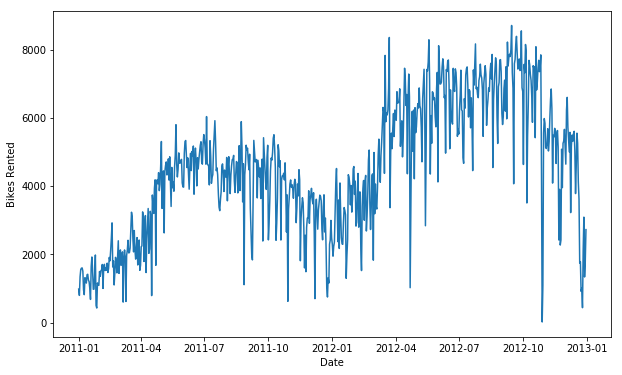

In [14]:
# Plot the data
plt.plot(cnt_ts)
plt.ylabel('Bikes Rented')
plt.xlabel('Date')
plt.show()

In [15]:
#Check the stationarity of the data
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean_30 = pd.rolling_mean(timeseries, window=30)
    rolmean_7 = pd.rolling_mean(timeseries, window=7)
    rolstd= pd.rolling_std(timeseries, window=30)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean_30, color='red', label='Monthly moving average')
    mean = plt.plot(rolmean_7, color='green', label='Weekly moving average')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\anaconda\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
C:\anaconda\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
C:\anaconda\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).std()


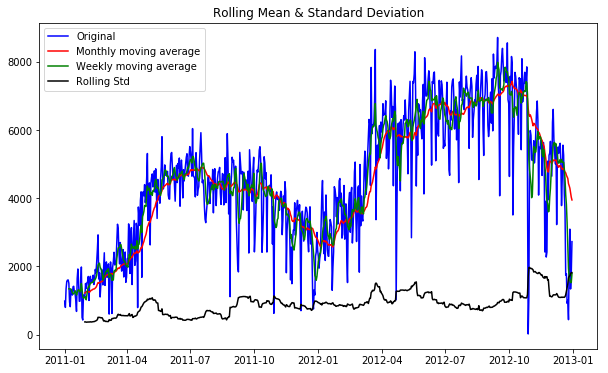

Results of Dickey-Fuller Test:
Test Statistic                  -1.877448
p-value                          0.342743
#Lags Used                      13.000000
Number of Observations Used    717.000000
Critical Value (1%)             -3.439503
Critical Value (5%)             -2.865579
Critical Value (10%)            -2.568921
dtype: float64


In [16]:
test_stationarity(cnt_ts)

In [ ]:
#The data is not stationary since both mean. variance are changing for different windows

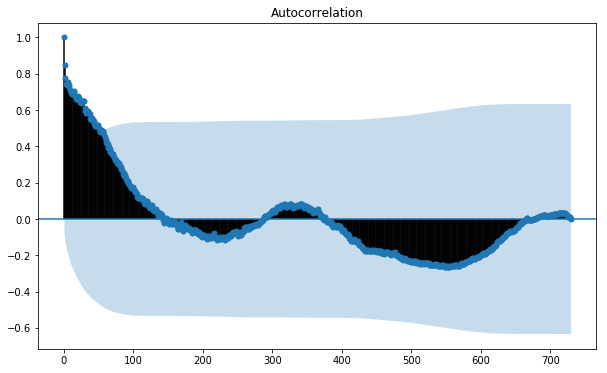

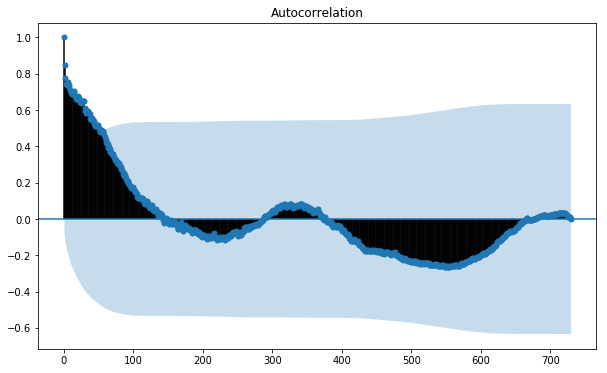

In [117]:
#ACF of the data shows its non stationary property
plot_acf(cnt_ts)

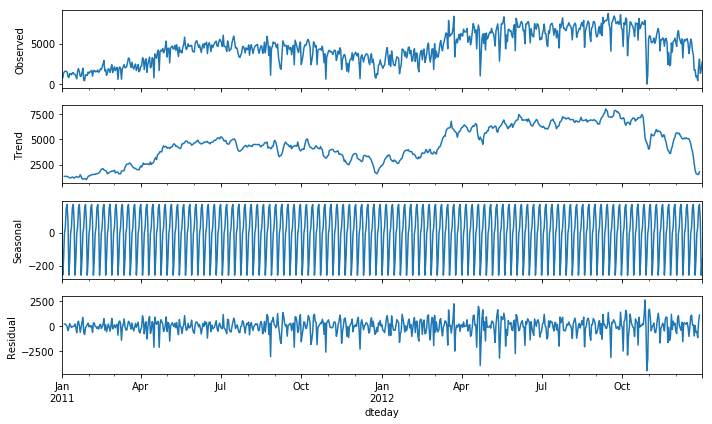

In [18]:
#Decompose the data to check the various components seasonal,trend and random componenet present
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(cnt_ts,model="additive")
fig = result.plot()


In [19]:
#Dividing into training and test set

In [20]:
train = cnt_ts.loc['2011-01-01':'2012-10-31']
test = cnt_ts.loc['2012-11-10':]

In [144]:
#We will use the seasonal model developed to predict the test values

In [145]:
###########Model  Developemt##########

In [21]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(cnt_ts, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

C:\anaconda\lib\site-packages\pyramid\__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    
  """, UserWarning)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=11893.844, BIC=11916.727, Fit time=7.496 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=12557.044, BIC=12566.197, Fit time=0.178 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=12313.854, BIC=12332.160, Fit time=2.331 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=11954.155, BIC=11972.461, Fit time=5.155 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=11895.276, BIC=11922.735, Fit time=6.456 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=12330.591, BIC=12348.897, Fit time=1.334 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=11897.510, BIC=11924.969, Fit time=18.348 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=11915.061, BIC=11947.097, Fit time=27.785 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=11910.903, BIC=11938.361, Fit time=12.635 seconds
Fit ARI

In [22]:
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 1, 1, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

In [23]:
future_forecast = stepwise_model.predict(n_periods=52)

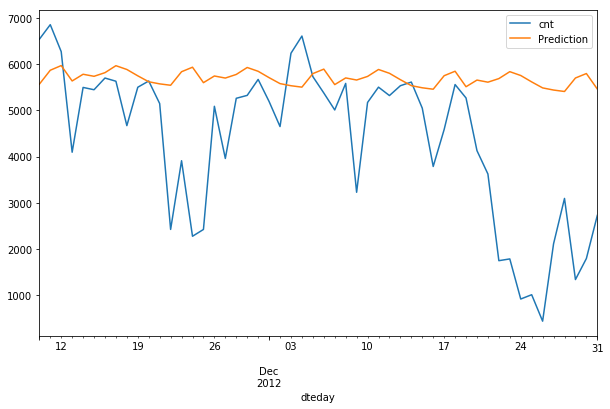

In [25]:
#Predict the test data
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=["Prediction"])
pd.concat([test,future_forecast],axis=1).plot()

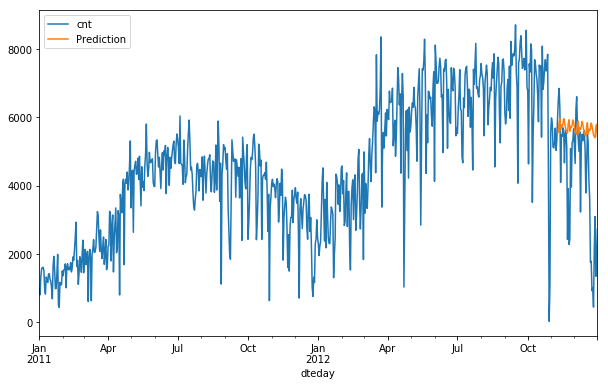

In [26]:
pd.concat([cnt_ts,future_forecast],axis=1).plot()